## How LSTM Works
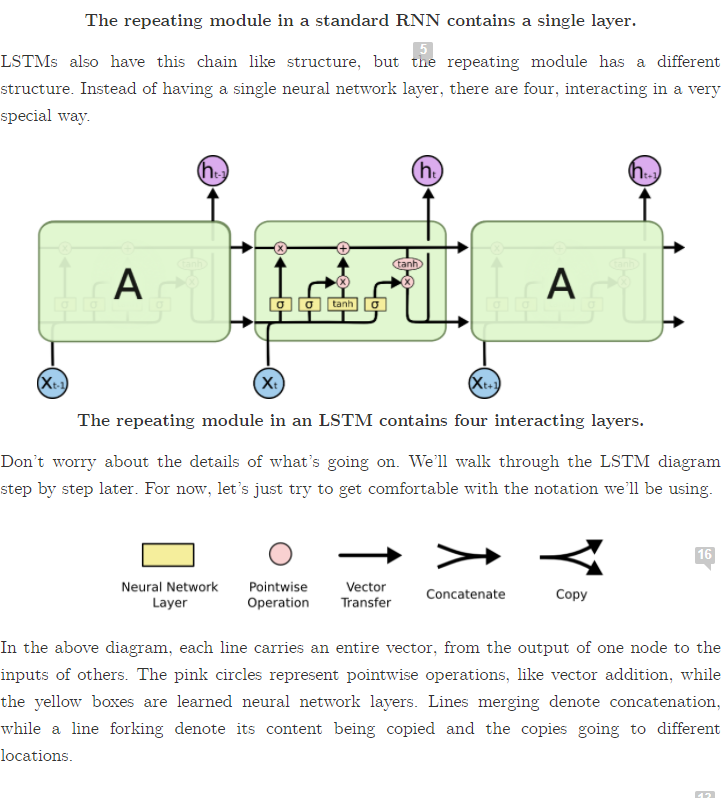

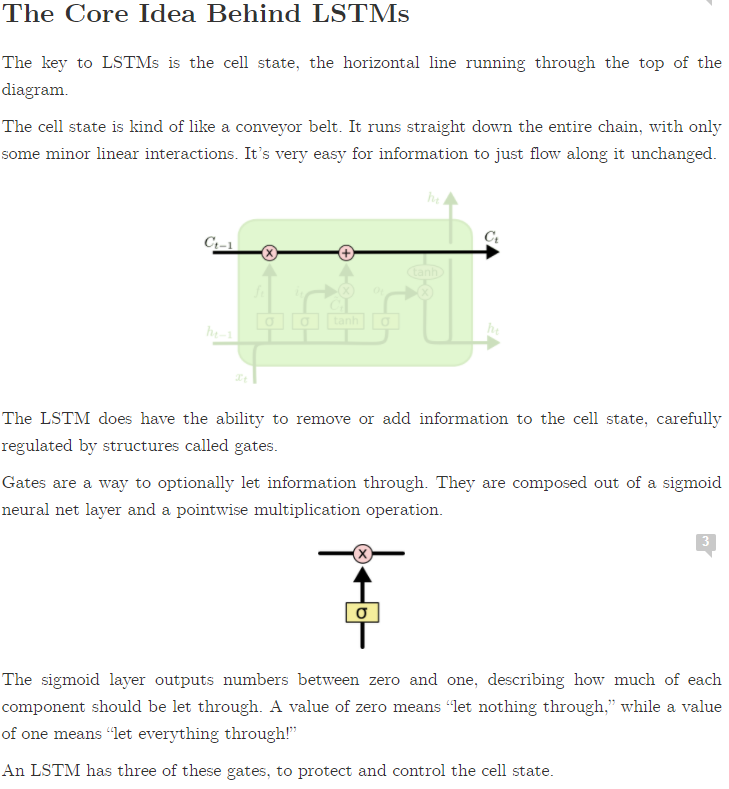

#### **you can read the rest on http://colah.github.io/posts/2015-08-Understanding-LSTMs/**

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #CuDNNLSTM - faster way
import matplotlib.pyplot as plt
import numpy as np

gpu = tf.config.experimental.list_physical_devices('GPU')
len(gpu)

1

In [5]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(28, 28)


In [6]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
# return_sequences, to flat layer always best to set it to False, but sisnce we are not using Flatten, we can leave True there
# LSTM is always followed by Dropout !!!

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [7]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
# decay is decreasing the learning rate every batch
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 58s 968us/sample - loss: 0.6721 - accuracy: 0.7778 - val_loss: 0.2041 - val_accuracy: 0.9425
Epoch 2/3
60000/60000 [==============================] - 57s 944us/sample - loss: 0.1739 - accuracy: 0.9532 - val_loss: 0.0948 - val_accuracy: 0.9725
Epoch 3/3
60000/60000 [==============================] - 55s 923us/sample - loss: 0.1197 - accuracy: 0.9676 - val_loss: 0.0765 - val_accuracy: 0.9782


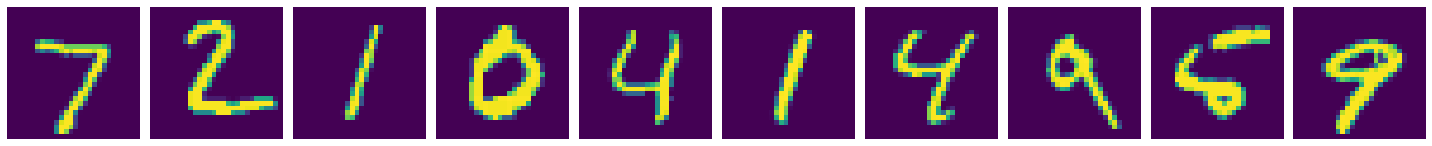

In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')  # usuwa osie, zeby samo zdjecie bylo widoczne
    plt.tight_layout() # brings the photos closer to each other
    plt.show()
    
plotImages(x_test[:10])

In [29]:
pred = model.predict(x_test)

In [41]:
np.argmax(pred[1])

2